# Chicago's Bike Share Data Analysis
- `By:Abdulaziz Abdullah`

### Importing Required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
sns.set()

### Importing data

In [3]:
df=pd.read_csv('Data Source/Divvy_Trips_2019_Q4.csv')

### Data Assessing

In [4]:
df.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [5]:
df.tail()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
704049,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
704050,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
704051,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
704052,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0
704053,25962904,2019-12-31 23:57:17,2019-12-31 23:59:18,5930,120.0,256,Broadway & Sheridan Rd,240,Sheridan Rd & Irving Park Rd,Subscriber,Male,1982.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            704054 non-null  int64  
 1   start_time         704054 non-null  object 
 2   end_time           704054 non-null  object 
 3   bikeid             704054 non-null  int64  
 4   tripduration       704054 non-null  object 
 5   from_station_id    704054 non-null  int64  
 6   from_station_name  704054 non-null  object 
 7   to_station_id      704054 non-null  int64  
 8   to_station_name    704054 non-null  object 
 9   usertype           704054 non-null  object 
 10  gender             637463 non-null  object 
 11  birthyear          642373 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 64.5+ MB


In [7]:
df.describe(include='all')

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
count,7.040540e+05,704054,704054,704054.000000,704054,704054.000000,704054,704054.000000,704054,704054,637463,642373.000000
unique,NaN,633380,632834,NaN,10401,NaN,610,NaN,608,2,2,NaN
top,NaN,2019-12-05 17:11:39,2019-10-07 17:54:43,NaN,352.0,NaN,Canal St & Adams St,NaN,Canal St & Adams St,Subscriber,Male,NaN
freq,NaN,7,6,NaN,975,NaN,12937,NaN,12812,597860,486459,NaN
mean,2.559222e+07,NaN,NaN,3396.362711,NaN,203.959479,NaN,203.946606,NaN,NaN,NaN,1983.808776
std,2.135697e+05,NaN,NaN,1913.953377,NaN,157.782842,NaN,157.938449,NaN,NaN,NaN,11.097284
min,2.522364e+07,NaN,NaN,1.000000,NaN,2.000000,NaN,2.000000,NaN,NaN,NaN,1899.000000
25%,2.540738e+07,NaN,NaN,1724.000000,NaN,77.000000,NaN,77.000000,NaN,NaN,NaN,1978.000000
50%,2.559086e+07,NaN,NaN,3473.000000,NaN,174.000000,NaN,174.000000,NaN,NaN,NaN,1987.000000
75%,2.577717e+07,NaN,NaN,5065.000000,NaN,291.000000,NaN,291.000000,NaN,NaN,NaN,1992.000000


In [8]:
df['birthyear'].max()

2003.0

In [9]:
df['birthyear'].min()

1899.0

In [10]:
2019-df['birthyear'].min()

120.0

- A customer whose age is 120 years old is probably an issue in the data.

In [11]:
df.isna().any()

trip_id              False
start_time           False
end_time             False
bikeid               False
tripduration         False
from_station_id      False
from_station_name    False
to_station_id        False
to_station_name      False
usertype             False
gender                True
birthyear             True
dtype: bool

- Both gender and birthyear columns contain missing values

In [12]:
df.duplicated().any()

False

- There are no duplicate rows in the data

In [14]:
df_missings=df[np.logical_and(df['birthyear'].isna(),df['gender'].isna())]
df_missings

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
9,25223649,2019-10-01 00:05:20,2019-10-01 02:23:46,2957,"8,306.0",336,Cottage Grove Ave & 47th St,336,Cottage Grove Ave & 47th St,Customer,NaN,NaN
13,25223653,2019-10-01 00:08:52,2019-10-01 00:29:17,5005,"1,224.0",240,Sheridan Rd & Irving Park Rd,230,Lincoln Ave & Roscoe St,Customer,NaN,NaN
15,25223656,2019-10-01 00:10:46,2019-10-01 00:16:04,4595,318.0,373,Kedzie Ave & Chicago Ave,377,Kedzie Ave & Lake St,Customer,NaN,NaN
18,25223659,2019-10-01 00:13:21,2019-10-01 00:34:12,3602,"1,251.0",106,State St & Pearson St,334,Lake Shore Dr & Belmont Ave,Customer,NaN,NaN
20,25223661,2019-10-01 00:15:22,2019-10-01 00:40:42,447,"1,520.0",133,Kingsbury St & Kinzie St,673,Lincoln Park Conservatory,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
704005,25962853,2019-12-31 23:12:07,2019-12-31 23:38:52,3467,"1,605.0",76,Lake Shore Dr & Monroe St,35,Streeter Dr & Grand Ave,Customer,NaN,NaN
704040,25962891,2019-12-31 23:49:38,2020-01-01 00:15:19,2936,"1,540.0",90,Millennium Park,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
704041,25962892,2019-12-31 23:49:43,2020-01-01 00:21:51,1671,"1,927.0",90,Millennium Park,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN
704042,25962893,2019-12-31 23:49:51,2020-01-01 00:22:08,3925,"1,936.0",90,Millennium Park,76,Lake Shore Dr & Monroe St,Customer,NaN,NaN


In [15]:
missings=df_missings.shape[0]/df.shape[0]
print('Percentage of rows with missing values {}%'.format(round(missings*100,2)))

Percentage of rows with missing values 8.76%


In [16]:
df[df['birthyear'].isna()]['usertype'].value_counts(normalize=True)

Customer      0.987808
Subscriber    0.012192
Name: usertype, dtype: float64

- 99% of the rows with missing data at birth year column belong to customers not subscribers

In [17]:
df[df['gender'].isna()]['usertype'].value_counts(normalize=True)

Customer      0.924089
Subscriber    0.075911
Name: usertype, dtype: float64

- 92% of the rows with missing data at gender column belong to customers not subscribers

In [18]:
df[np.logical_not(df['birthyear'].isna())]['usertype'].value_counts()

Subscriber    597108
Customer       45265
Name: usertype, dtype: int64

In [19]:
df.shape

(704054, 12)

The records with missing values at both gender and birth year columns belong to customers, and by removing these data we will lose useful information about the behaviour of customers, so i decided to make two data frames, one will be clean from all missing values and the other will keep the missing values

### Quality Issues
- 1) Start Time column data type is object
- 2) End Time column data type is object
- 3) Missing values at both columns gender and birth year
- 4) Gender column data type is object
- 5) Drop Unwanted columns (tripduration-from_station_id-to_station_id-trip_id)
- 6) Make a reasonable threshold for customers birth year column


---

In [20]:
df_clean=df.copy()
df_customers=df.copy()

## Data Cleaning

`Issue 1` : Start Time column must be of date time instead of object

- Code

In [21]:
df_clean['start_time']=pd.to_datetime(df_clean['start_time'])
df_customers['start_time']=pd.to_datetime(df_customers['start_time'])

- Test

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            704054 non-null  int64         
 1   start_time         704054 non-null  datetime64[ns]
 2   end_time           704054 non-null  object        
 3   bikeid             704054 non-null  int64         
 4   tripduration       704054 non-null  object        
 5   from_station_id    704054 non-null  int64         
 6   from_station_name  704054 non-null  object        
 7   to_station_id      704054 non-null  int64         
 8   to_station_name    704054 non-null  object        
 9   usertype           704054 non-null  object        
 10  gender             637463 non-null  object        
 11  birthyear          642373 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 64.5+ MB


In [23]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            704054 non-null  int64         
 1   start_time         704054 non-null  datetime64[ns]
 2   end_time           704054 non-null  object        
 3   bikeid             704054 non-null  int64         
 4   tripduration       704054 non-null  object        
 5   from_station_id    704054 non-null  int64         
 6   from_station_name  704054 non-null  object        
 7   to_station_id      704054 non-null  int64         
 8   to_station_name    704054 non-null  object        
 9   usertype           704054 non-null  object        
 10  gender             637463 non-null  object        
 11  birthyear          642373 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 64.5+ MB


----

`Issue 2` : End Time column must be of date time instead of object

- Code

In [24]:
df_clean['end_time']=pd.to_datetime(df_clean['end_time'])
df_customers['end_time']=pd.to_datetime(df_customers['end_time'])

- Test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            704054 non-null  int64         
 1   start_time         704054 non-null  datetime64[ns]
 2   end_time           704054 non-null  datetime64[ns]
 3   bikeid             704054 non-null  int64         
 4   tripduration       704054 non-null  object        
 5   from_station_id    704054 non-null  int64         
 6   from_station_name  704054 non-null  object        
 7   to_station_id      704054 non-null  int64         
 8   to_station_name    704054 non-null  object        
 9   usertype           704054 non-null  object        
 10  gender             637463 non-null  object        
 11  birthyear          642373 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 64.5+ MB


In [26]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            704054 non-null  int64         
 1   start_time         704054 non-null  datetime64[ns]
 2   end_time           704054 non-null  datetime64[ns]
 3   bikeid             704054 non-null  int64         
 4   tripduration       704054 non-null  object        
 5   from_station_id    704054 non-null  int64         
 6   from_station_name  704054 non-null  object        
 7   to_station_id      704054 non-null  int64         
 8   to_station_name    704054 non-null  object        
 9   usertype           704054 non-null  object        
 10  gender             637463 non-null  object        
 11  birthyear          642373 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 64.5+ MB


`Issue 3`: Missing records at gender and birthyear

- Code

In [27]:
df_clean=df_clean.dropna()

- Test

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637463 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            637463 non-null  int64         
 1   start_time         637463 non-null  datetime64[ns]
 2   end_time           637463 non-null  datetime64[ns]
 3   bikeid             637463 non-null  int64         
 4   tripduration       637463 non-null  object        
 5   from_station_id    637463 non-null  int64         
 6   from_station_name  637463 non-null  object        
 7   to_station_id      637463 non-null  int64         
 8   to_station_name    637463 non-null  object        
 9   usertype           637463 non-null  object        
 10  gender             637463 non-null  object        
 11  birthyear          637463 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 63.2+ MB


-----

`Issue 4`: Drop Unwanted columns (tripduration-from_station_id-to_station_id-trip_id)

- Code

In [29]:
df_clean=df_clean.drop(['tripduration','from_station_id','to_station_id','trip_id'],axis=1)
df_customers=df_customers.drop(['tripduration','from_station_id','to_station_id','trip_id'],axis=1)

- Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637463 entries, 0 to 704053
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_time         637463 non-null  datetime64[ns]
 1   end_time           637463 non-null  datetime64[ns]
 2   bikeid             637463 non-null  int64         
 3   from_station_name  637463 non-null  object        
 4   to_station_name    637463 non-null  object        
 5   usertype           637463 non-null  object        
 6   gender             637463 non-null  object        
 7   birthyear          637463 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 43.8+ MB


In [31]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   start_time         704054 non-null  datetime64[ns]
 1   end_time           704054 non-null  datetime64[ns]
 2   bikeid             704054 non-null  int64         
 3   from_station_name  704054 non-null  object        
 4   to_station_name    704054 non-null  object        
 5   usertype           704054 non-null  object        
 6   gender             637463 non-null  object        
 7   birthyear          642373 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 43.0+ MB


`Issue 5`: Drop records whose birth year is less than 1939

- Code

In [32]:
df_clean=df_clean[df_clean['birthyear']>=1945]

- Test

In [33]:
df_clean['birthyear'].min()

1945.0

------

## Feature Engineering 

**`- Features to extract`:**

1) Month

2) Day of the week

3) Trip duration in minutes

4) Start Trip Hour

5) Start Trip Hour Group

6) Age

7) Age Group

8) Start and End Station Combination

---

- 1) Month 

In [34]:
df_clean['month']=df_clean['start_time'].dt.month
df_customers['month']=df_customers['start_time'].dt.month

- 2) Day of the week

In [35]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_clean['weekday'] = df_clean['start_time'].dt.dayofweek.map(dayOfWeek)
df_customers['weekday'] = df_customers['start_time'].dt.dayofweek.map(dayOfWeek)

- 3) Trip duration in minutes

In [36]:
df_clean['duration']=df_clean['end_time']-df_clean['start_time']
df_customers['duration']=df_customers['end_time']-df_clean['start_time']

In [37]:
df_clean['duration_minutes']=df_clean['duration'].dt.components['minutes']
df_customers['duration_minutes']=df_customers['duration'].dt.components['minutes']

- 4) Start Trip Hour

In [38]:
df_clean['hr']=df_clean['start_time'].dt.hour
df_customers['hr']=df_customers['start_time'].dt.hour

- 5) Starting Trip Hour Grouping

In [39]:
rang=[0,3,6,9,12,15,18,21,23]
label=['12am-3am','3am-6am','6am-9am','9am-12pm','12pm-3pm','3pm-6pm','6pm-9pm','9pm-12am']
df_clean['start_time_cat']=pd.cut(df_clean['hr'],bins=rang,labels=label, include_lowest=True)
df_customers['start_time_cat']=pd.cut(df_customers['hr'],bins=rang,labels=label, include_lowest=True)

- 6) Engineering Age column

In [40]:
df_clean['age']=2019-df_clean['birthyear']

- 7) Age Grouping

In [41]:
age_range=[16,18,25,35,45,55,65,100]
group=['16-18','18-25','25-35','35-45','45-55','55-65','65+']
df_clean['age_group']=pd.cut(df_clean['age'],bins=age_range,labels=group,include_lowest=True)

In [42]:
df_clean['Destination']=df_clean['from_station_name'] +' - '+ df_clean['to_station_name']
df_customers['Destination']=df_customers['from_station_name']+' - '+ df_customers['to_station_name']

---

## Cleaning Data after Feature Engineering 

In [43]:
df_clean.head()

,start_time,end_time,bikeid,from_station_name,to_station_name,usertype,gender,birthyear,month,weekday,duration,duration_minutes,hr,start_time_cat,age,age_group,Destination
0,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,Sheffield Ave & Kingsbury St,Leavitt St & Armitage Ave,Subscriber,Male,1987.0,10,Tuesday,0 days 00:15:41,15,0,12am-3am,32.0,25-35,Sheffield Ave & Kingsbury St - Leavitt St & Ar...
1,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,Throop (Loomis) St & Taylor St,Morgan St & Polk St,Subscriber,Male,1998.0,10,Tuesday,0 days 00:04:18,4,0,12am-3am,21.0,18-25,Throop (Loomis) St & Taylor St - Morgan St & P...
2,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,Milwaukee Ave & Grand Ave,Wabash Ave & Grand Ave,Subscriber,Female,1991.0,10,Tuesday,0 days 00:14:11,14,0,12am-3am,28.0,25-35,Milwaukee Ave & Grand Ave - Wabash Ave & Grand...
3,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,Lakeview Ave & Fullerton Pkwy,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0,10,Tuesday,0 days 00:39:11,39,0,12am-3am,29.0,25-35,Lakeview Ave & Fullerton Pkwy - Kedzie Ave & P...
4,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,Ashland Ave & Division St,Western Ave & Congress Pkwy,Subscriber,Male,1987.0,10,Tuesday,0 days 00:31:08,31,0,12am-3am,32.0,25-35,Ashland Ave & Division St - Western Ave & Cong...


In [43]:
df_customers.head()

,start_time,end_time,bikeid,from_station_name,to_station_name,usertype,gender,birthyear,month,weekday,duration,duration_minutes,hr,start_time_cat,Destination
0,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,Sheffield Ave & Kingsbury St,Leavitt St & Armitage Ave,Subscriber,Male,1987.0,10,Tuesday,0 days 00:15:41,15.0,0,12am-3am,Sheffield Ave & Kingsbury St - Leavitt St & Ar...
1,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,Throop (Loomis) St & Taylor St,Morgan St & Polk St,Subscriber,Male,1998.0,10,Tuesday,0 days 00:04:18,4.0,0,12am-3am,Throop (Loomis) St & Taylor St - Morgan St & P...
2,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,Milwaukee Ave & Grand Ave,Wabash Ave & Grand Ave,Subscriber,Female,1991.0,10,Tuesday,0 days 00:14:11,14.0,0,12am-3am,Milwaukee Ave & Grand Ave - Wabash Ave & Grand...
3,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,Lakeview Ave & Fullerton Pkwy,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0,10,Tuesday,0 days 00:39:11,39.0,0,12am-3am,Lakeview Ave & Fullerton Pkwy - Kedzie Ave & P...
4,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,Ashland Ave & Division St,Western Ave & Congress Pkwy,Subscriber,Male,1987.0,10,Tuesday,0 days 00:31:08,31.0,0,12am-3am,Ashland Ave & Division St - Western Ave & Cong...


In [44]:
df_clean=df_clean.drop(['start_time','end_time','birthyear','duration'],axis=1)
df_customers=df_customers.drop(['start_time','end_time','birthyear','duration'],axis=1)

## EDA

In [45]:
df_clean.head(5)

,bikeid,from_station_name,to_station_name,usertype,gender,month,weekday,duration_minutes,hr,start_time_cat,age,age_group,Destination
0,2215,Sheffield Ave & Kingsbury St,Leavitt St & Armitage Ave,Subscriber,Male,10,Tuesday,15,0,12am-3am,32.0,25-35,Sheffield Ave & Kingsbury St - Leavitt St & Ar...
1,6328,Throop (Loomis) St & Taylor St,Morgan St & Polk St,Subscriber,Male,10,Tuesday,4,0,12am-3am,21.0,18-25,Throop (Loomis) St & Taylor St - Morgan St & P...
2,3003,Milwaukee Ave & Grand Ave,Wabash Ave & Grand Ave,Subscriber,Female,10,Tuesday,14,0,12am-3am,28.0,25-35,Milwaukee Ave & Grand Ave - Wabash Ave & Grand...
3,3275,Lakeview Ave & Fullerton Pkwy,Kedzie Ave & Palmer Ct,Subscriber,Male,10,Tuesday,39,0,12am-3am,29.0,25-35,Lakeview Ave & Fullerton Pkwy - Kedzie Ave & P...
4,5294,Ashland Ave & Division St,Western Ave & Congress Pkwy,Subscriber,Male,10,Tuesday,31,0,12am-3am,32.0,25-35,Ashland Ave & Division St - Western Ave & Cong...


- Univariate

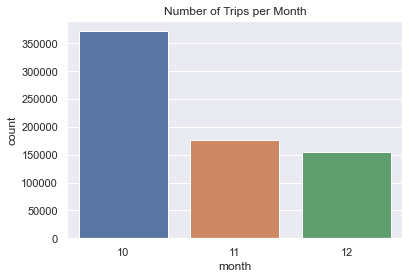

In [46]:
sns.countplot(data=df_customers,x='month');
plt.title('Number of Trips per Month');

- Number of trips is significantly higher at october 

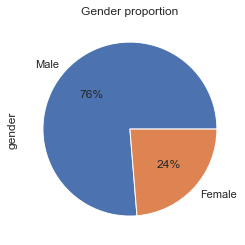

In [47]:
sns.set()
plt.title('Gender proportion');
df_clean['gender'].value_counts(normalize=True).plot(kind='pie',autopct='%.0f%%');

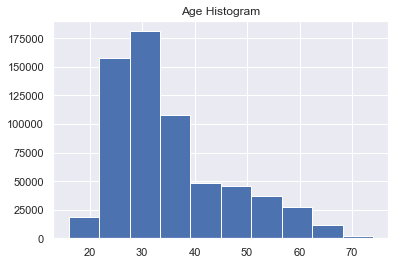

In [48]:
plt.hist(df_clean['age']);
plt.title('Age Histogram');

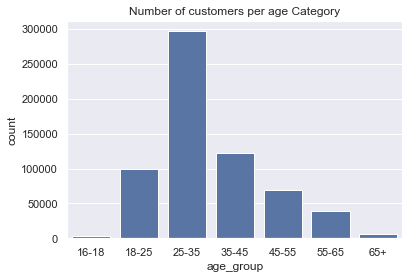

In [49]:
base_color=sns.color_palette()[0]
sns.countplot(data=df_clean,x='age_group',color=base_color);
plt.title('Number of customers per age Category');

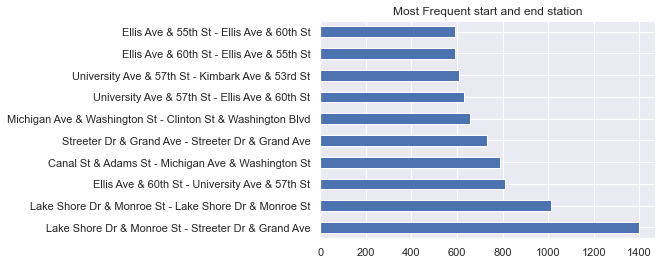

In [51]:
df_customers['Destination'].value_counts()[:10].plot(kind='barh');
plt.title('Most Frequent start and end station');

In [53]:
df_customers['usertype'].value_counts(normalize=True)*100

Subscriber    84.916782
Customer      15.083218
Name: usertype, dtype: float64

- Bivariate

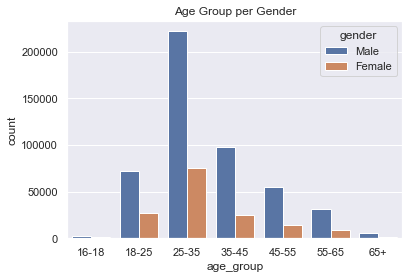

In [54]:
sns.countplot(data=df_clean,x='age_group',hue='gender');
plt.title('Age Group per Gender');

- The most common age group is between 25 and 35 years old

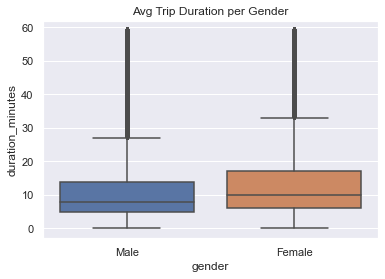

In [55]:
sns.boxplot(data=df_clean,x='gender',y='duration_minutes');
plt.title('Avg Trip Duration per Gender');

- On avg women's trip duration is longer than men's trip 

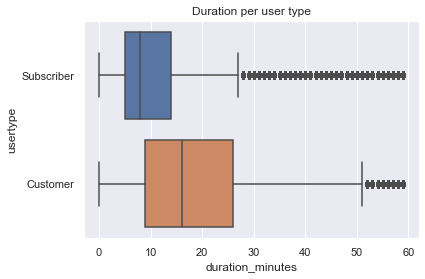

In [56]:
sns.boxplot(data=df_customers,x='duration_minutes',y='usertype');
plt.title('Duration per user type');

- Avg trip durtion of customers is higher than subscribers

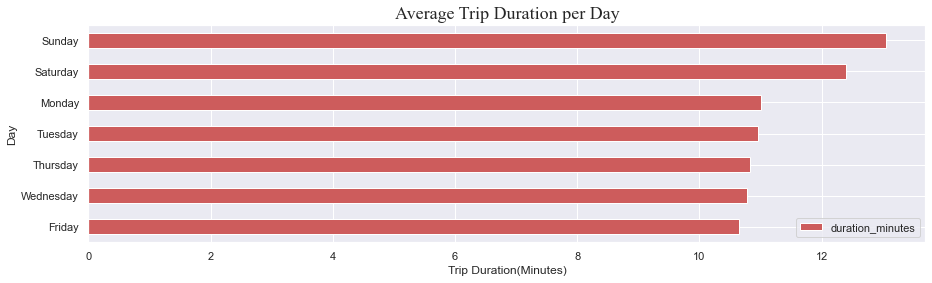

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
df_customers.groupby(by='weekday').agg({'duration_minutes':'mean'}).sort_values(
    by='duration_minutes',ascending=True).plot(kind='barh',ax=ax,color='IndianRed');
plt.title('Average Trip Duration per Day',fontsize=18,fontname='Times new roman');
plt.ylabel('Day');
plt.xlabel('Trip Duration(Minutes)');

- Sunday has the highest avg trip duration

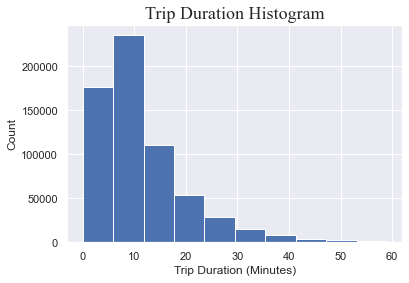

In [58]:
plt.hist(df_customers['duration_minutes']);
plt.title('Trip Duration Histogram',fontsize=18,fontname='Times new roman');
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count');

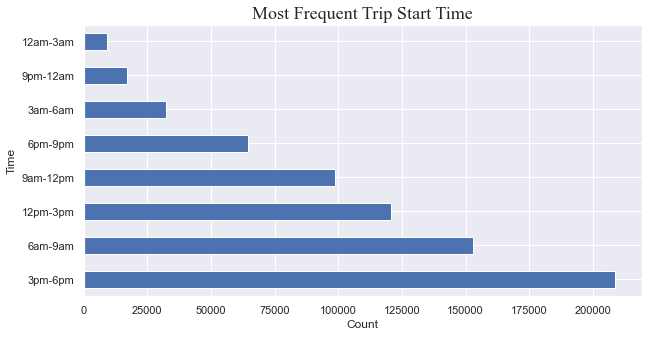

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
df_customers['start_time_cat'].value_counts().plot(kind='barh',ax=ax);
plt.title('Most Frequent Trip Start Time',fontsize=18,fontname='Times new roman');
plt.xlabel('Count');
plt.ylabel('Time');

- The highest demand on bikes is between 3pm and 6pm

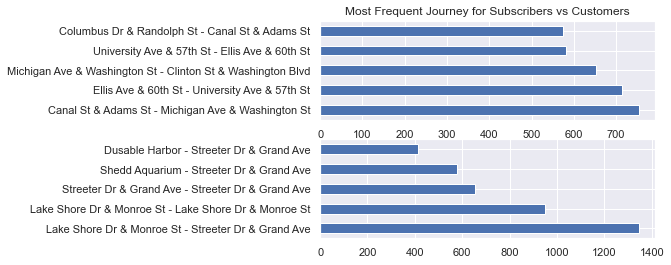

In [60]:
plt.figure()
plt.subplot(2,1,1)
df_customers[df_customers['usertype']=='Subscriber']['Destination'].value_counts()[:5].plot(kind='barh');
plt.title('Most Frequent Journey for Subscribers vs Customers'); 
plt.subplot(2,1,2)
df_customers[df_customers['usertype']=='Customer']['Destination'].value_counts()[:5].plot(kind='barh');
#plt.title('Most Frequent Journey for Customers');    

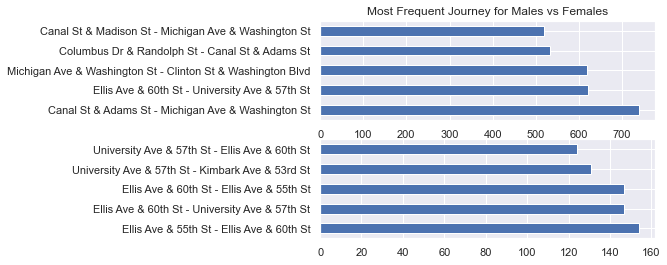

In [61]:
plt.figure()
plt.subplot(2,1,1)
df_clean[df_clean['gender']=='Male']['Destination'].value_counts()[:5].plot(kind='barh');
plt.title('Most Frequent Journey for Males vs Females'); 
plt.subplot(2,1,2)
df_clean[df_clean['gender']=='Female']['Destination'].value_counts()[:5].plot(kind='barh');
#plt.title('Most Frequent Journey for Customers');  

-----

In [63]:
df_customers.head(2)

,bikeid,from_station_name,to_station_name,usertype,gender,month,weekday,duration_minutes,hr,start_time_cat,Destination
0,2215,Sheffield Ave & Kingsbury St,Leavitt St & Armitage Ave,Subscriber,Male,10,Tuesday,15.0,0,12am-3am,Sheffield Ave & Kingsbury St - Leavitt St & Ar...
1,6328,Throop (Loomis) St & Taylor St,Morgan St & Polk St,Subscriber,Male,10,Tuesday,4.0,0,12am-3am,Throop (Loomis) St & Taylor St - Morgan St & P...


In [95]:
df_clean.head(2)

,bikeid,from_station_name,to_station_name,usertype,gender,month,weekday,duration_minutes,hr,start_time_cat,age,age_group,Destination
0,2215,Sheffield Ave & Kingsbury St,Leavitt St & Armitage Ave,Subscriber,Male,10,Tuesday,15,0,12am-3am,32.0,25-35,Sheffield Ave & Kingsbury St - Leavitt St & Ar...
1,6328,Throop (Loomis) St & Taylor St,Morgan St & Polk St,Subscriber,Male,10,Tuesday,4,0,12am-3am,21.0,18-25,Throop (Loomis) St & Taylor St - Morgan St & P...


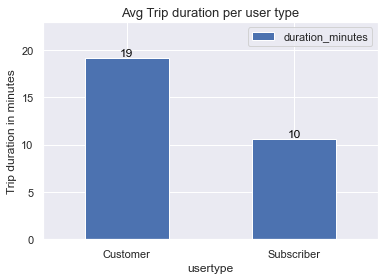

In [82]:
import math
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
df_customers.groupby(by='usertype').agg({'duration_minutes':'mean'}).plot(kind='bar');
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set

ax.set_ylim([0, 23])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
      
plt.title('Avg Trip duration per user type',fontsize=13)
plt.xticks(rotation=0);
plt.ylabel('Trip duration in minutes');

- On averge customer's trip take 19 minutes while subscriber's trip take 10 minutes, which means that we could expect the customer to have longer trip than the subscriber.

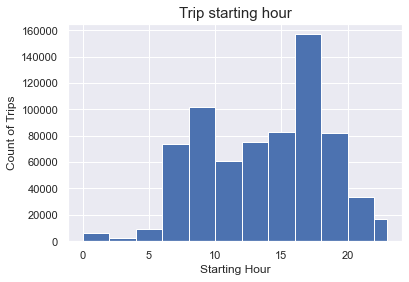

In [88]:
bins=[0,2,4,6,8,10,12,14,16,18,20,22,23]
plt.hist(df_customers['hr'],bins=bins);
plt.title('Trip starting hour',fontsize=15);
plt.ylabel('Count of Trips');
plt.xlabel('Starting Hour');

- The most frequent starting trip hour is between 4pm to 6pm, followed by the period from 8 am to 10 am, these are the hours of commuting.

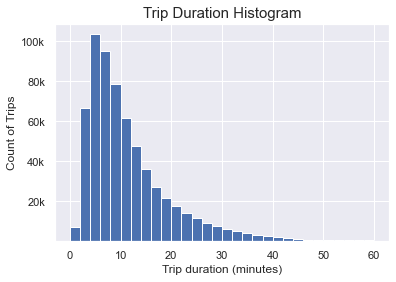

In [123]:
bins_d=np.arange(0,df_customers['duration_minutes'].max()+2,2)
plt.hist(df_customers['duration_minutes'],bins=bins_d);
plt.title('Trip Duration Histogram',fontsize=15);
plt.xlabel('Trip duration (minutes)');
plt.ylabel('Count of Trips');
plt.yticks([20000,40000,60000,80000,100000],['20k','40k','60k','80k','100k']);

- Trip duration data is right skewed and the most frequent trip duration values are between 4 to 10 minuets.

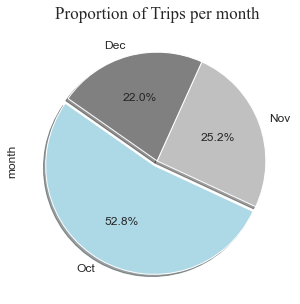

In [94]:
plt.figure(figsize=[6,5])
my_colors = ['lightblue','silver','grey']
my_explode = (0.05,0,0)
df_customers['month'].value_counts(normalize=True).plot(kind='pie',labels=['Oct','Nov','Dec'],fontsize=12,autopct='%1.1f%%', startangle=145, shadow = True
                                                           ,colors=my_colors,explode=my_explode);
plt.title('Proportion of Trips per month',fontname='Times new roman',fontsize=17);

- On the 4th quarter of 2019 almost 53% of the trips where on october, we also see the number of trips declined from October to November to December.

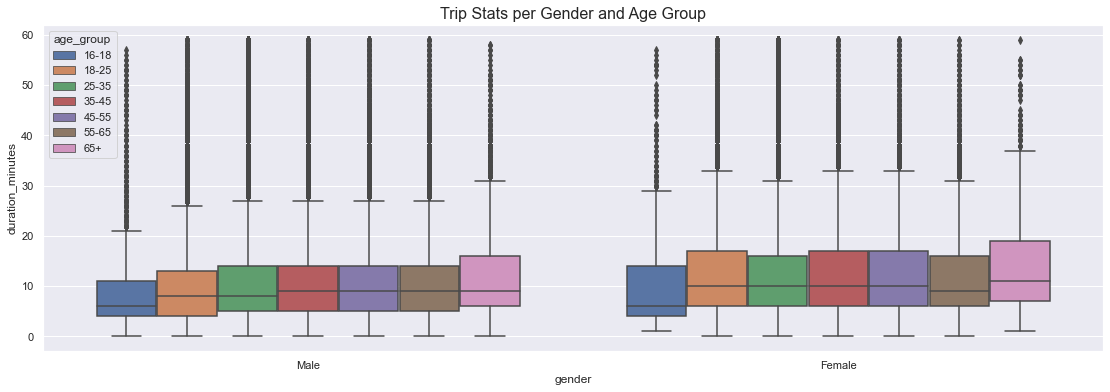

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(19, 6)
sns.boxplot(x="gender", y="duration_minutes", hue='age_group', data=df_clean);
plt.title('Trip Stats per Gender and Age Group',fontsize=16);

- People from the age group 16 to 18 years old have the lowest average trip duration at both genders
- Old seniors have the highest avg trip duration among different age groups 
- Old female seniors have the highest trip duration among different groups and genders


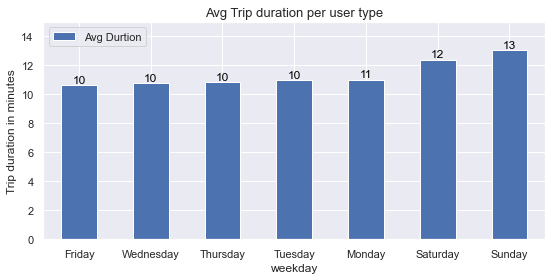

In [142]:

def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 

fig, ax = plt.subplots()
fig.set_size_inches(9, 4)
df_customers.groupby(by='weekday').agg({'duration_minutes':'mean'}).sort_values(by='duration_minutes').plot(kind='bar',ax=ax)
# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set

ax.set_ylim([0, 15])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
      
plt.title('Avg Trip duration per user type',fontsize=13)
plt.xticks(rotation=0)
plt.ylabel('Trip duration in minutes');
plt.legend(['Avg Durtion'], loc='upper left');

- Weekends have a higher avg trip duration than other days

In [143]:
df_customers.head()

,bikeid,from_station_name,to_station_name,usertype,gender,month,weekday,duration_minutes,hr,start_time_cat,Destination
0,2215,Sheffield Ave & Kingsbury St,Leavitt St & Armitage Ave,Subscriber,Male,10,Tuesday,15.0,0,12am-3am,Sheffield Ave & Kingsbury St - Leavitt St & Ar...
1,6328,Throop (Loomis) St & Taylor St,Morgan St & Polk St,Subscriber,Male,10,Tuesday,4.0,0,12am-3am,Throop (Loomis) St & Taylor St - Morgan St & P...
2,3003,Milwaukee Ave & Grand Ave,Wabash Ave & Grand Ave,Subscriber,Female,10,Tuesday,14.0,0,12am-3am,Milwaukee Ave & Grand Ave - Wabash Ave & Grand...
3,3275,Lakeview Ave & Fullerton Pkwy,Kedzie Ave & Palmer Ct,Subscriber,Male,10,Tuesday,39.0,0,12am-3am,Lakeview Ave & Fullerton Pkwy - Kedzie Ave & P...
4,5294,Ashland Ave & Division St,Western Ave & Congress Pkwy,Subscriber,Male,10,Tuesday,31.0,0,12am-3am,Ashland Ave & Division St - Western Ave & Cong...


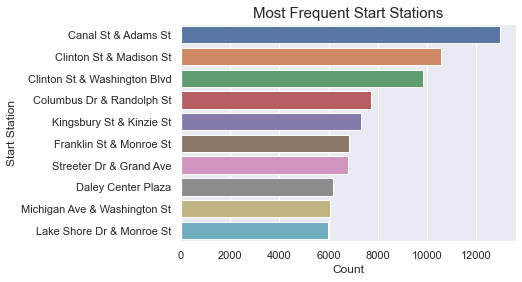

In [174]:
sns.barplot(y=df_customers['from_station_name'].value_counts()[:10].index, x=df_customers['from_station_name'].value_counts()[:10])
plt.title('Most Frequent Start Stations',fontsize=15);
plt.ylabel('Start Station');
plt.xlabel('Count');

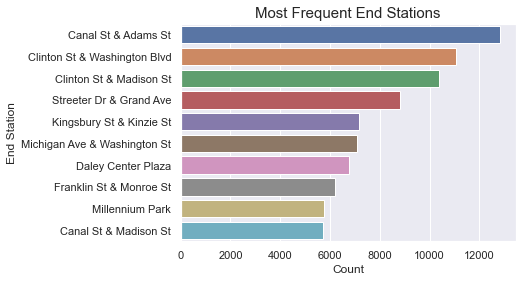

In [176]:
sns.barplot(y=df_customers['to_station_name'].value_counts()[:10].index, x=df_customers['to_station_name'].value_counts()[:10])
plt.title('Most Frequent End Stations',fontsize=15);
plt.ylabel('End Station');
plt.xlabel('Count');

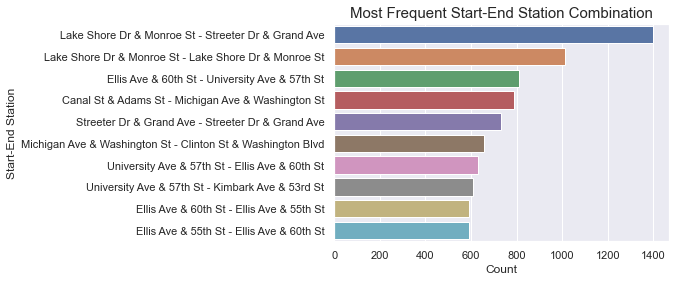

In [178]:
sns.barplot(y=df_customers['Destination'].value_counts()[:10].index, x=df_customers['Destination'].value_counts()[:10])
plt.title('Most Frequent Start-End Station Combination',fontsize=15);
plt.ylabel('Start-End Station');
plt.xlabel('Count');

In [179]:
df_customers.head(2)

,bikeid,from_station_name,to_station_name,usertype,gender,month,weekday,duration_minutes,hr,start_time_cat,Destination
0,2215,Sheffield Ave & Kingsbury St,Leavitt St & Armitage Ave,Subscriber,Male,10,Tuesday,15.0,0,12am-3am,Sheffield Ave & Kingsbury St - Leavitt St & Ar...
1,6328,Throop (Loomis) St & Taylor St,Morgan St & Polk St,Subscriber,Male,10,Tuesday,4.0,0,12am-3am,Throop (Loomis) St & Taylor St - Morgan St & P...


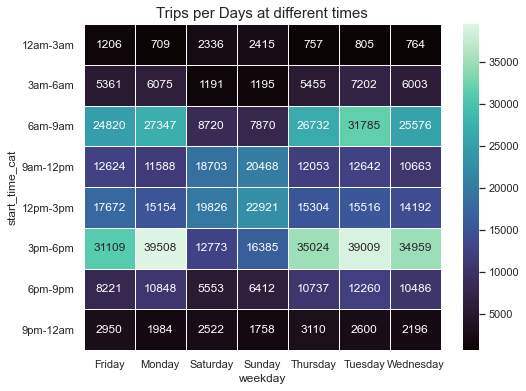

In [189]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

ct_counts=df_customers.groupby(['start_time_cat','weekday']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='start_time_cat',columns='weekday',values='count')
sns.heatmap(ct_counts,annot=True,linewidths=0.5,fmt='d', cmap="mako",ax=ax);
plt.title('Trips per Days at different times',fontsize=15);

- Number of trips at time between 12am and 3am is the lowest among other times in the day followed by the time between 9pm to 12 am.

- Number of trips at time between 3pm to 6pm is the highest among other times during the day.

- The highest number of trips is at monday at the time between 3pm to 6pm.

## Regression Model

- Preparing data for Regression model
- Firstly our Feature(dependant is the trip duration varible in minutes)
- Secondly our variables are as follow:

- 1) Gender(Female or Male)

- 2) weekday(weekend or not) 

- 3) user type (Subscriber or Customer)

- 4) age (from 16 to 35 or from 36 to 57 or more than 57 years old)

- 5) Trip Starting Hour(12 am to 6 am - 6 am to 12 pm - from 12 pm to 6 pm - 6 pm to 12 am)


In [190]:
df_reg=df_clean.copy()

In [191]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636924 entries, 0 to 704053
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   bikeid             636924 non-null  int64   
 1   from_station_name  636924 non-null  object  
 2   to_station_name    636924 non-null  object  
 3   usertype           636924 non-null  object  
 4   gender             636924 non-null  object  
 5   month              636924 non-null  int64   
 6   weekday            636924 non-null  object  
 7   duration_minutes   636924 non-null  int64   
 8   hr                 636924 non-null  int64   
 9   start_time_cat     636924 non-null  category
 10  age                636924 non-null  float64 
 11  age_group          636924 non-null  category
 12  Destination        636924 non-null  object  
dtypes: category(2), float64(1), int64(4), object(6)
memory usage: 79.5+ MB


In [192]:
df_reg=df_reg.drop(['bikeid','from_station_name','to_station_name','start_time_cat','age_group','Destination'],axis=1)

In [193]:
df_reg['weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [194]:
weekend=[]
for _ in df_reg['weekday']:
    if _ == "Saturday" or _ =='Sunday':
        weekend.append('Weekend')
    else:
        weekend.append('Weekday')

In [195]:
df_reg['Day_type']=weekend

In [196]:
bins_a=[16,35,55,80]
labels_a=['16-35','35-55','55-80']
df_reg['Age_Cat']=pd.cut(df_reg['age'],bins=bins_a,labels=labels_a,include_lowest=True)

bins_h=[0,6,12,18,23]
labels_h=['0-6','6-12','12-18','18-23']
df_reg['hrs_Cat']=pd.cut(df_reg['hr'],bins=bins_h,labels=labels_h,include_lowest=True)

In [197]:
df_reg['gender']=df_reg['gender'].replace({'Male':1,'Female':0})

In [198]:
df_reg['usertype']=df_reg['usertype'].replace({'Subscriber':1,'Customer':0})

In [199]:
df_reg['Day_type']=df_reg['Day_type'].replace({'Weekend':1,'Weekday':0})

In [200]:
df_reg[['16-35','35-55','55-80']]=pd.get_dummies(df_reg['Age_Cat'])

In [201]:
df_reg[['0-6','6-12','12-18','18-23']]=pd.get_dummies(df_reg['hrs_Cat'])

In [202]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636924 entries, 0 to 704053
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   usertype          636924 non-null  int64   
 1   gender            636924 non-null  int64   
 2   month             636924 non-null  int64   
 3   weekday           636924 non-null  object  
 4   duration_minutes  636924 non-null  int64   
 5   hr                636924 non-null  int64   
 6   age               636924 non-null  float64 
 7   Day_type          636924 non-null  int64   
 8   Age_Cat           636924 non-null  category
 9   hrs_Cat           636924 non-null  category
 10  16-35             636924 non-null  uint8   
 11  35-55             636924 non-null  uint8   
 12  55-80             636924 non-null  uint8   
 13  0-6               636924 non-null  uint8   
 14  6-12              636924 non-null  uint8   
 15  12-18             636924 non-null  uint8   
 16  18

In [203]:
Y=df_reg['duration_minutes']
X=df_reg[['gender','usertype','Day_type','16-35','35-55','0-6','6-12','12-18']]

In [204]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [205]:
X_train.shape, Y_train.shape

((509539, 8), (509539,))

In [206]:
model= linear_model.LinearRegression()

In [207]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [208]:
Y_pred = model.predict(X_test)

In [209]:
print('Coefficients:{}'.format(model.coef_))
print('Intercept:{}'.format(model.intercept_))
print('Mean squared error(MSE): %.2f'% mean_squared_error(Y_test,Y_pred))
print('Coefficients of determination(R^2): %.2f' % r2_score(Y_test,Y_pred))

Coefficients:[-1.56095251 -8.24398012  1.06962181 -0.88159929 -0.07109831 -0.71022677
  0.09351913  0.88300187]
Intercept:20.032479364699803
Mean squared error(MSE): 71.18
Coefficients of determination(R^2): 0.08


In [210]:
df_reg['intercept']=1
lm=sm.OLS(df_reg['duration_minutes'],df_reg[['intercept','gender','usertype','Day_type','16-35','35-55','0-6','6-12','12-18']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       duration_minutes   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     6491.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:45:05   Log-Likelihood:            -2.2598e+06
No. Observations:              636924   AIC:                         4.520e+06
Df Residuals:                  636915   BIC:                         4.520e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.0675      0.068    296.540      0.000      19.935      20.200
gender        -1.5509      0.025    -62.339      0.000      -1.600      -1.502
usertype      -8.2610      0.042   -197.280      0.000      -8.343      -8.179
Day_type       1.0685      0.027     39.304      0.000       1.015       1.122
16-35         -0.9157      0.042    -22.056      0.000      -0.997      -0.834
35-55         -0.0948      0.044     -2.173      0.030      -0.180      -0.009
0-6           -0.6764      0.053    -12.835      0.000      -0.780      -0.573
6-12           0.1068      0.036      2.993      0.003       0.037       0.177
12-18          0.8947      0.035     25.786      0.000       0.827       0.963
==============================================================================
Omnibus:                   193255.218   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           564181.963
Skew:                           1.602   Prob(JB):                         0.00
Kurtosis:                       6.316   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----